In [1]:
# data analysis and cleaning
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# CALCULATING TOTAL MALES AND FEMALES ONBOARD
male = 0
female = 0
for sex in train_data['Sex']:
    if sex=='male':
        male+=1
    elif sex=='female':
        female+=1
    else:
        print(sex)

In [4]:
# FILLING NaN VALUES IN AGE COLUMN
train_data['Age'].fillna(train_data['Age'].median() , inplace=True)

In [5]:
# CALCULATING MALE AND FEMALE SURVIVORS
male_survived = 0
for male in train_data['Survived'][train_data['Sex']=='male']:
    if male==1:
        male_survived+=1
print(male_survived)

female_survived = 0
for female in train_data['Survived'][train_data['Sex']=='female']:
    if female==1:
        female_survived+=1
print(female_survived)

109
233


In [6]:
total_males = train_data[train_data['Sex']=='male']
print('Total : ',len(total_males) , ', Survived : ' , male_survived)
total_females = train_data[train_data['Sex']=='female']
print('Total : ',len(total_females) , ', Survived : ' , female_survived)

Total :  577 , Survived :  109
Total :  314 , Survived :  233


In [7]:
print('Percentage of female survivals are ' , (female_survived / len(total_females))*100)
print('Percentage of male survivals are ' , (male_survived / len(total_males))*100)

Percentage of female survivals are  74.20382165605095
Percentage of male survivals are  18.890814558058924


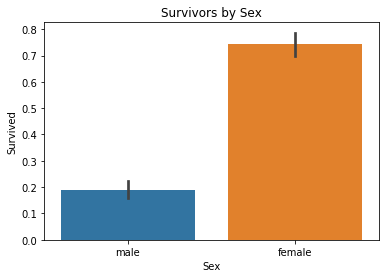

In [8]:
# SURVIVORS WRT SEX
sns.barplot(x='Sex' , y='Survived' , data=train_data)
plt.title('Survivors by Sex')
plt.show()

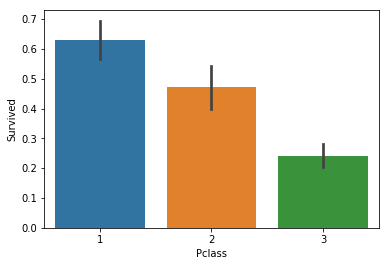


Percentage of Plcass 1 who survived :  62.96296296296296
Percentage of Plcass 2 who survived :  47.28260869565217
Percentage of Plcass 2 who survived :  26.65987780040733


In [9]:
# SURVIVORS WRT CLASS OF PASSENGERS
sns.barplot(x='Pclass' , y='Survived' , data=train_data)
plt.show()
print()
##Print the percentage of survivors wrt class
print('Percentage of Plcass 1 who survived : ' , train_data['Survived'][train_data['Pclass']==1].value_counts(normalize=True)[1]*100)
print('Percentage of Plcass 2 who survived : ' , train_data['Survived'][train_data['Pclass']==2].value_counts(normalize=True)[1]*100)
print('Percentage of Plcass 2 who survived : ' , train_data['Survived'][train_data['Pclass']==3].value_counts(normalize=True)[1]*110)

Percentage of survivors wrt Siblings and Spouse :  34.53947368421053
Percentage of survivors wrt Siblings and Spouse :  53.588516746411486
Percentage of survivors wrt Siblings and Spouse :  46.42857142857143


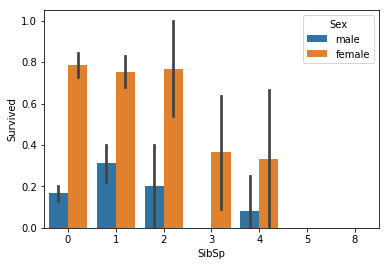

In [10]:
sns.barplot(x='SibSp' , y='Survived' , data=train_data , hue='Sex')
print('Percentage of survivors wrt Siblings and Spouse : ' ,train_data['Survived'][train_data['SibSp']==0].value_counts(normalize=True)[1]*100)
print('Percentage of survivors wrt Siblings and Spouse : ' ,train_data['Survived'][train_data['SibSp']==1].value_counts(normalize=True)[1]*100)
print('Percentage of survivors wrt Siblings and Spouse : ' ,train_data['Survived'][train_data['SibSp']==2].value_counts(normalize=True)[1]*100)

In [11]:
# CLEANING OUR DATA FROM NaN VALUES
test_data.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Cacic, Mr. Jego Grga",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [12]:
# THE CABIN and Ticket FEATURE DOES'NT HELP US WITH OUR SURVIVOR PREDICTION, WE DROP IT
train_data = train_data.drop(['Cabin'],axis=1)
test_data = test_data.drop(['Cabin'],axis=1)

train_data = train_data.drop(['Ticket'],axis=1)
test_data = test_data.drop(['Ticket'],axis=1)

In [13]:
# FILLING THE NULL VALUES IN EMBARKED FEATURE

#FIRST FINDING THE TOTAL NO OF PASSENGERS IN EACH PLACE
s = train_data[train_data['Embarked']=='S']
print('People embarking in SouthHampton ',len(s))

c= train_data[train_data['Embarked']=='C']
print('People embarking in Cherbourg ',len(c))

q = train_data[train_data['Embarked']=='Q']
print('People embarking in Queenstown ',len(q))

People embarking in SouthHampton  644
People embarking in Cherbourg  168
People embarking in Queenstown  77


In [14]:
# MAJORITY OF PEOPLE ARE FROM SOUTHAMPTON THEREFORE :
train_data = train_data.fillna({'Embarked' : 'S'})

In [15]:
# CLEANING THE AGE DATA
combined_data = [train_data , test_data]
for combine in combined_data:
    combine['Title'] = combine.Name.str.extract(' ([A-Za-z]+)\.')

In [16]:
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
## REPLACING LESS COMMON TITLES WITH OTHER
for dataset in combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [18]:
# CONVERTING THE TITLES TO CATEGORIES
for dataset in combined_data:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0


In [19]:
# CONVERTING SEX TO CATEGORIES
for dataset in combined_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1.0


In [20]:
# CONVERTING EMBARKED TO CATEGORIES

for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1.0


In [22]:
for dataset in combined_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S' : 0 , 'C' : 1 , 'Q' : 2} ).astype(int)

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1.0


In [24]:
# FILLING THE NULL AGE VALUES
for dataset in combined_data:
    avg_age = dataset['Age'].mean()
    std_age = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()

# CHANGING NULL AGE VALUES
null_age = np.random.randint(avg_age - std_age , avg_age + std_age , size=age_null_count)
dataset['Age'][np.isnan(dataset['Age'])] = null_age
dataset['Age'] = dataset['Age'].astype(int)

# CLASSIFYING THE AGES INTO BINS , BINS=5
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
for dataset in combined_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)

In [26]:
# FILLING THE NULL FARE VALUES
for dataset in combined_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_data['Fare'].median())
    
#CREATING A FAREBAND
train_data['FareBand'] = pd.qcut(train_data['Fare'] , 4)

In [27]:
for dataset in combined_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [28]:
# DEALING WITH SIBSP AND PARCH FEATURE
for dataset in combined_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [29]:
for dataset in combined_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [30]:
# REMOVING USELESS FEATURES
features_drop = ['Name', 'SibSp', 'Parch', 'FamilySize']
train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)
train_data = train_data.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

In [31]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1.0,0
1,1,1,1,2,3,1,3.0,0
2,1,3,1,1,1,0,2.0,1
3,1,1,1,2,3,0,3.0,0
4,0,3,0,2,1,0,1.0,1


In [32]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1.0,1
1,893,3,1,2,0,0,3.0,0
2,894,2,0,3,1,2,1.0,1
3,895,3,0,1,1,0,1.0,1
4,896,3,1,1,1,0,3.0,0


In [33]:
# CLASSIFYING TRAINING AND TEST DATA
X_train = train_data.drop('Survived' , axis=1)
y_train = train_data['Survived']
X_test = test_data.drop("PassengerId", axis=1)

X_train.shape , y_train.shape , X_test.shape

((891, 7), (891,), (418, 7))

In [34]:
# USING LOGISTIC REGRESSION
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.predict(X_test)
score = log_reg.score(X_train , y_train)*100
print(float(score),'percent score')

81.48148148148148 percent score


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
# SUPPORT VECTOR MACHINES
svm = SVC()
svm.fit(X_train , y_train)
svm.predict(X_test)
score_svm = svm.score(X_train , y_train)*100
print(float(score_svm),'percent score')

83.16498316498317 percent score


C:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [36]:
# LINEAR SUPPORT VECTOR MACHINES

lsvm = LinearSVC()
lsvm.fit(X_train ,y_train)
lsvm.predict(X_test)
lsvm_score = lsvm.score(X_train , y_train)*100
print(float(lsvm_score),'percent score')

80.58361391694724 percent score


C:\Anaconda\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
# K NEAREST NEIGHBOURS

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train , y_train)
knn.predict(X_test)
knn_score = knn.score(X_train , y_train)*100
print(float(knn_score),'percent score')

84.96071829405163 percent score


In [38]:
# DECISION TREE CLASSIFIER

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = clf.score(X_train, y_train) * 100
print (acc_decision_tree)

86.86868686868688


In [39]:
# RANDOM FOREST CLASSIFIER

clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)
y_pred_random_forest = clf_rf.predict(X_test)
acc_random_forest = clf_rf.score(X_train, y_train) * 100
print (acc_random_forest)

86.86868686868688


In [40]:
# GAUSSIAN NAIVE BAYES

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = clf.score(X_train, y_train) * 100
print (acc_gnb)

79.01234567901234


In [41]:
# COMPARING THE ACCURACY OF MODELS
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  'Linear SVC', 
              'Decision Tree'],
    'Score': [score_svm, knn_score,score, 
              acc_random_forest, acc_gnb,lsvm_score, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.868687
6,Decision Tree,86.868687
1,KNN,84.960718
0,Support Vector Machines,83.164983
2,Logistic Regression,81.481481
5,Linear SVC,80.583614
4,Naive Bayes,79.012346


In [42]:
print('Random Forest Classifier gives us best results')

Random Forest Classifier gives us best results


In [43]:
# CREATING A KAGGLE SUBMISSION

ids = test_data['PassengerId']
predictions = clf_rf.predict(test_data.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)